# X-OR Problem
Use a neural-network to solve the X-OR problem

In [2]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import models, layers, optimizers, Sequential

In [3]:
# Define variables
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0], [1], [1], [0]])

In [20]:
# Define model
m = Sequential()
# Add layers
m.add(layers.Dense(2, activation='sigmoid'))
m.add(layers.Dense(1, activation='sigmoid'))
# Compile model
m.compile(optimizer=optimizers.SGD(lr=0.5), batch_size=4, loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history = m.fit(X,y, batch_size=4, epochs=50000, verbose=0)

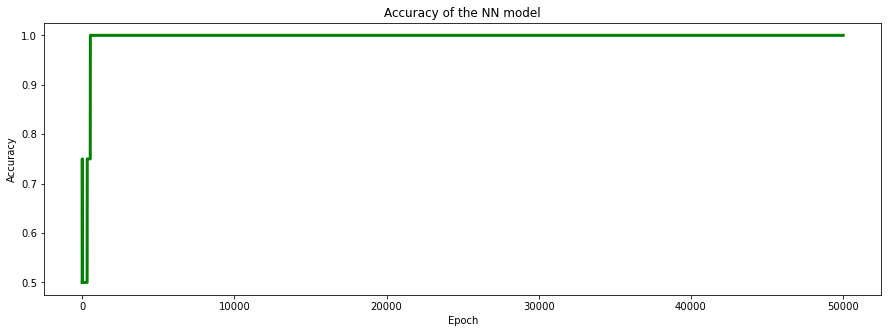

In [32]:
# Plot accuracy during training
plt.figure(figsize=(15,5))
plt.title('Accuracy of the NN model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['accuracy'], 'g', linewidth=3);

In [23]:
# Create a grid on which the trained NN can make predictions
xx, yy = np.mgrid[0:100, 0:100]
xx = xx/100
yy = yy/100

grid = pd.DataFrame({'x':xx.reshape(1,100*100)[0], 'y':yy.reshape(1,100*100)[0]})
grid_np = np.array(grid)

In [33]:
# Predict the model on the new grid
pred = m.predict(grid_np)

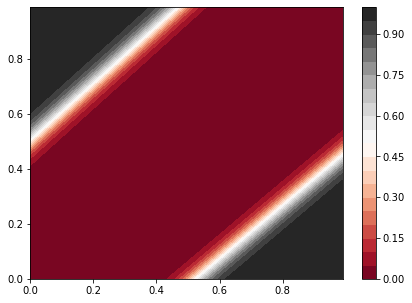

In [39]:
# Plot the prediction from the neural network
X = xx 
Y = yy
Z = pred.reshape(100,100)
plt.figure(figsize=(7,5))
plt.contourf(X,Y,Z, 20, cmap='RdGy');
plt.colorbar();